# Lab | Cleaning numerical data

### 1.Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2.Load the customer_value_analysis.csv into the variable customer_df. 

In [3]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 3.First look at its main features (head, shape, info).

In [4]:
display(data.head())
display(data.shape)
display(data.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

### 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [6]:
data1 = data.copy()
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
#manually change the column of 'employmentstatus'
data = data.rename(columns={'employmentstatus':'employment_status'})
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change the type of effective_to_date column to DateTime format

In [8]:
from datetime import datetime
# Convert "effective_to_date" column to DateTime format
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

# Display the updated data types
print(data.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6. Check NaN values per column.

In [10]:
#chack the null values
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

There are no null values. 

###  7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [19]:
def separate_numerical_categorical(data: pd.DataFrame) -> pd.DataFrame:
    '''
    This function separate data into one with numerical columns and one with categorical columns
    
    Input: pd.DataFrame
    Output: two types of pd.DataFrame
    '''
    numerical_df = data.select_dtypes(np.number)
    categorical_df = data.select_dtypes('object')

    return numerical_df, categorical_df

In [20]:
numerical_categorical = separate_numerical_categorical(data)
numericals = numerical_categorical[0]
display(numericals.head())
categorical = numerical_categorical[1]
display(categorical.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 8. Drop any ID column.

In [21]:
# Drop 'customer' column
categorical = categorical.drop('customer', axis=1)
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

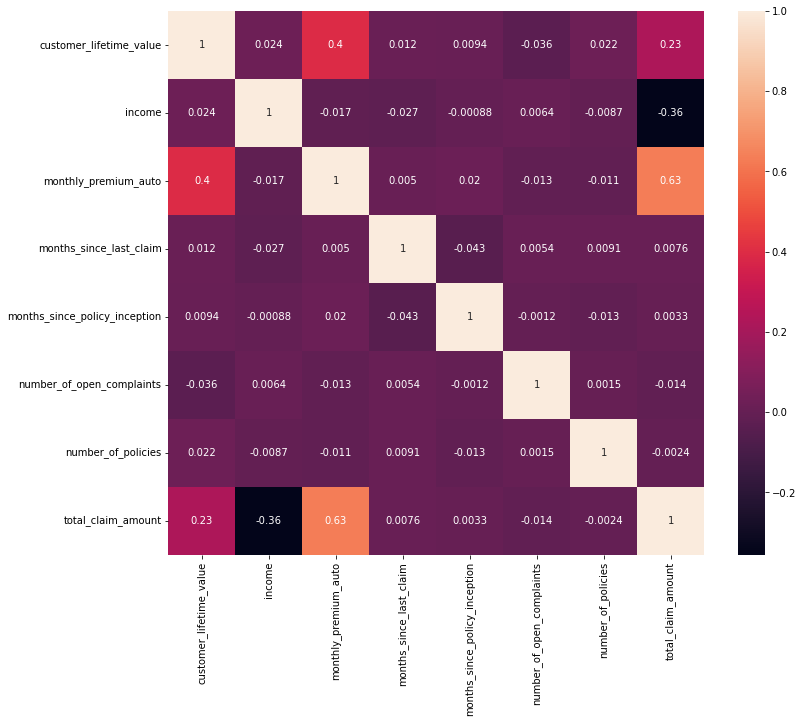

In [22]:
corr_matrix=numericals.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##### A pair of the highest correlation is 'monthly_premium_auto' and 'total_claim_amount': 0.63.  It means that customers spend more money to  monthly premuim auto because they tend to claim more.    

### 10.Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [27]:
def separate_numerical_columns(data: pd.DataFrame, threshold=36) -> pd.DataFrame:
    '''
    This function separate data into one with numerical continous columns and 
    another one with numerical discrete columns.
    The default to discreminate between two is set to 36.
    
    Input:
    pd.DataFrame
    int
    
    Output: pd.DataFrame
    
    '''
    continuous_columns = []
    discrete_columns = []

    for column in data.columns:
        if data[column].dtype in ['int','float']:
            if data[column].nunique() > threshold:
                continuous_columns.append(column)
            else:
                discrete_columns.append(column)

    continuous_df = data[continuous_columns]
    discrete_df = data[discrete_columns]

    return continuous_df, discrete_df

In [55]:
continous_discrete = separate_numerical_columns(numericals)
continuous_df = continous_discrete[0]
display(continuous_df.head())
discrete_df = continous_discrete[1]
display(discrete_df.head())
display(discrete_df.describe())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


,months_since_last_claim,number_of_open_complaints,number_of_policies
count,9134.000000,9134.000000,9134.000000
mean,15.097000,0.384388,2.966170
std,10.073257,0.910384,2.390182
min,0.000000,0.000000,1.000000
25%,6.000000,0.000000,1.000000
50%,14.000000,0.000000,2.000000
75%,23.000000,0.000000,4.000000
max,35.000000,5.000000,9.000000


### 11.Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [48]:
def create_barplots(df:pd.DataFrame)->None:
    
    '''
    This function  create a barplot for all the columns of the discrete_df using seaborn, 
    and set the figuresize = (16,16)
    
    Input: pd.DataFrame
    Output: None
    
    '''
    # Set the figure size
    plt.figure(figsize=(16, 16))
    
    # Get the column names of the dataframe
    columns = df.columns
    
    # Calculate the number of rows and columns for subplots
    n_rows = len(columns) // 3 + (len(columns) % 3 > 0)
    n_cols = 3
    
    # Create subplots
    for i, column in enumerate(columns):
        plt.subplot(n_rows, n_cols, i+1)
        sns.countplot(data=df, x=column)
        plt.title(column)
        plt.xticks(rotation=90)
    
    # Adjust the layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()


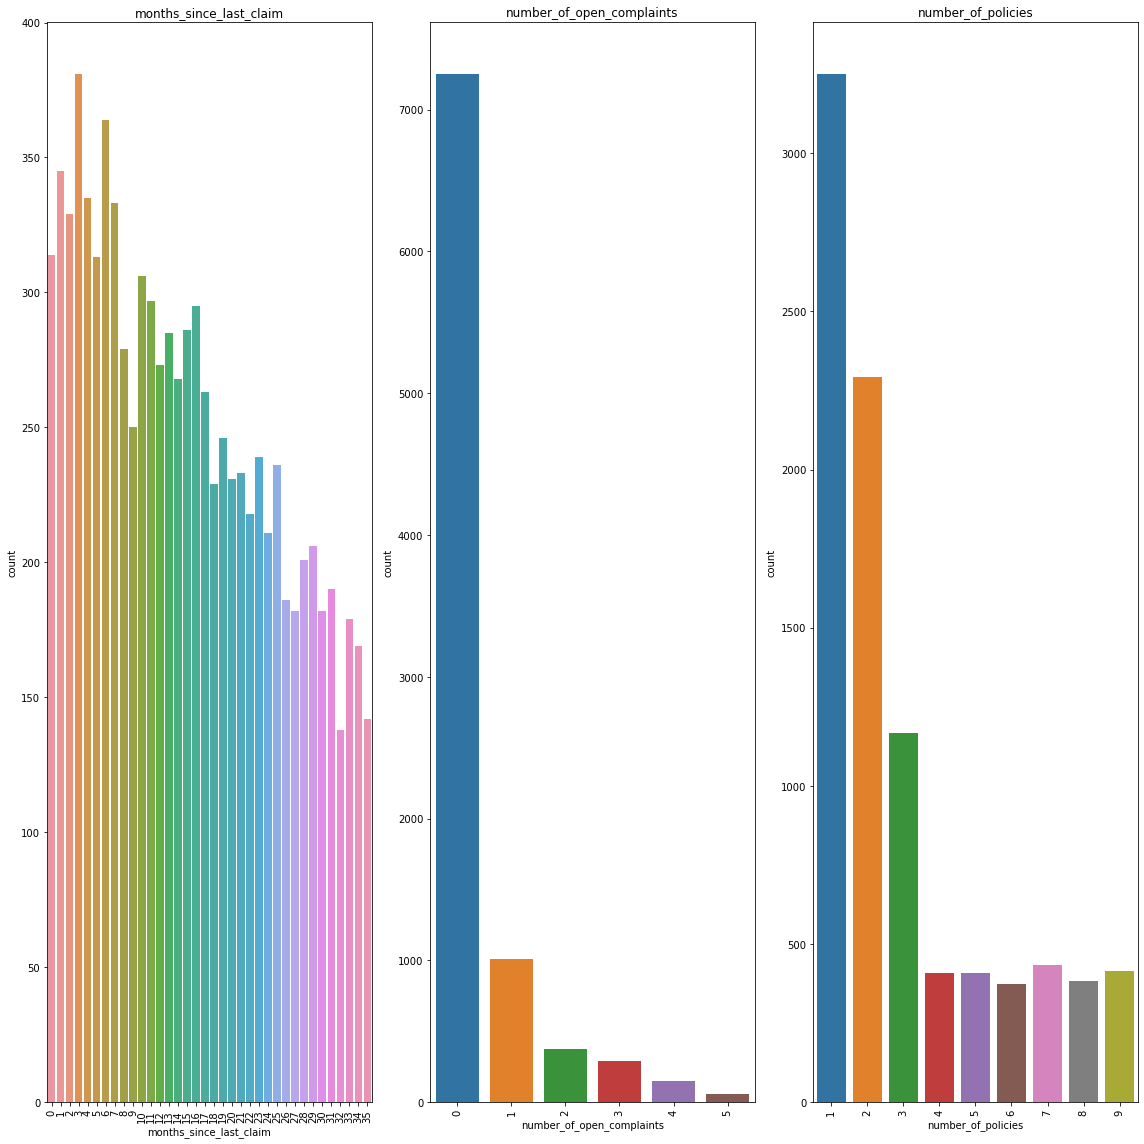

In [49]:
create_barplots(discrete_df)

### 12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [57]:
def create_histograms(dataframe):
    # Set the figure size
    plt.figure(figsize=(16, 16))
    
    # Get the column names of the dataframe
    columns = dataframe.columns
    
    # Calculate the number of rows and columns for subplots
    n_rows = len(columns) // 3 + (len(columns) % 3 > 0)
    n_cols = 3
    
    # Create subplots
    for i, column in enumerate(columns):
        plt.subplot(n_rows, n_cols, i+1)
        sns.histplot(data=dataframe[column])
        #plt.title(column)
    
    # Adjust the layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

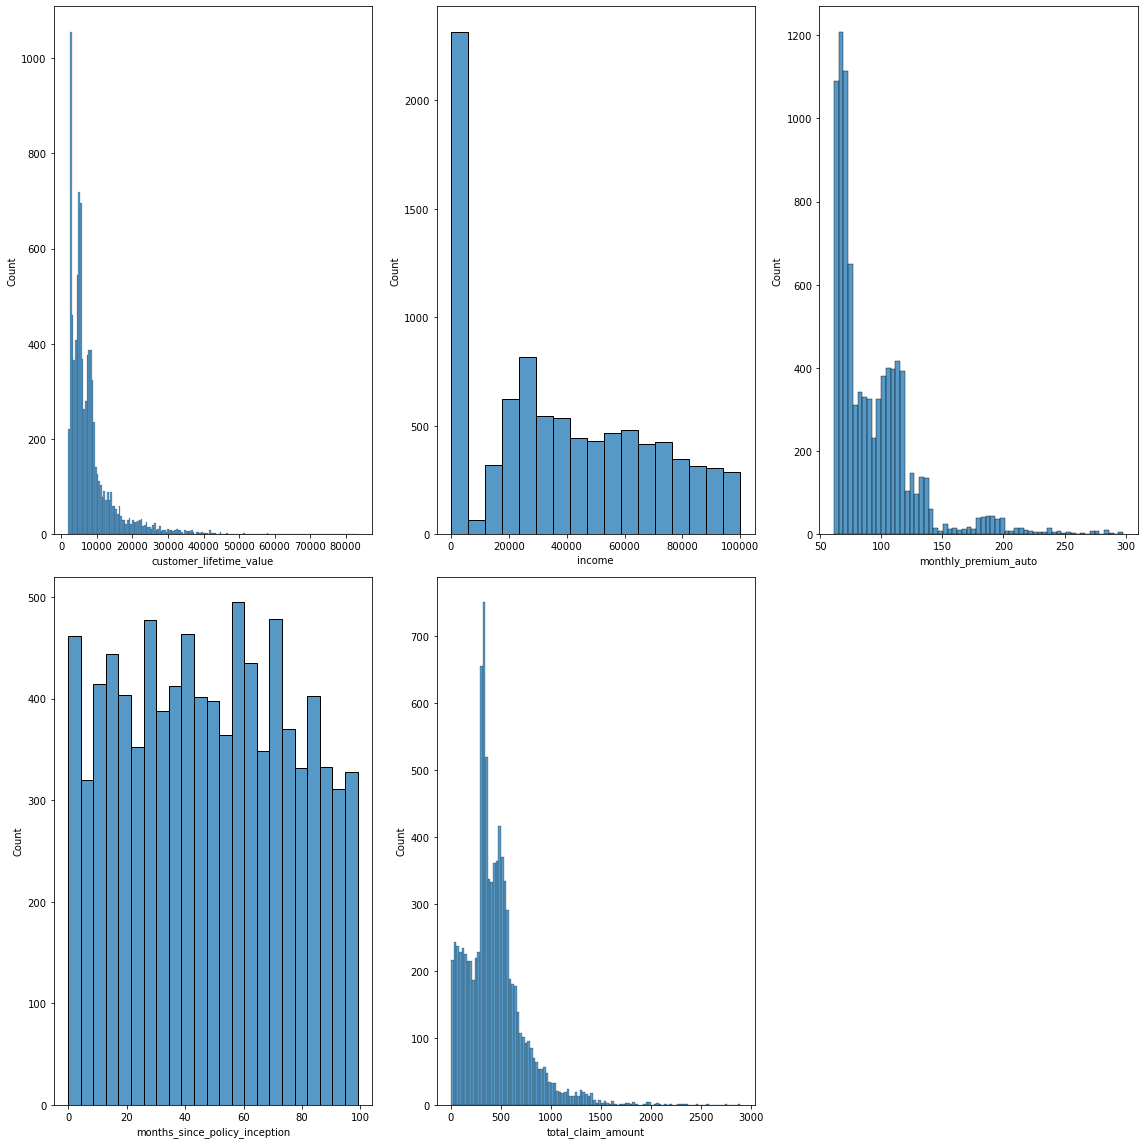

In [58]:
create_histograms(continuous_df)

### 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

#### Looking at the histogram plots, 'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount' are skewed and need some transformation.

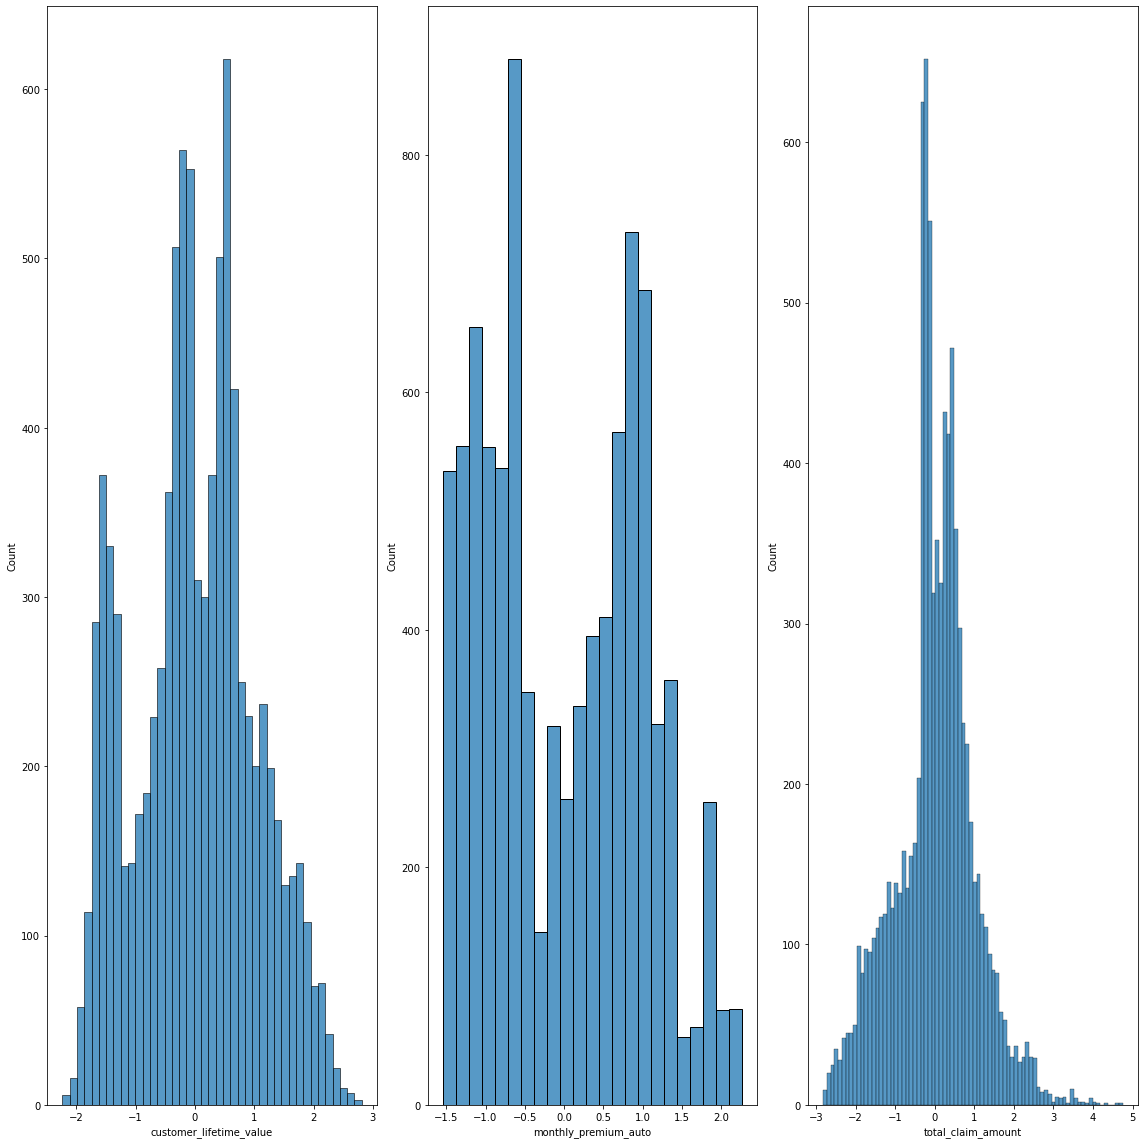

In [61]:
from sklearn.preprocessing import PowerTransformer


numerical_columns = ['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']

# Initialize the PowerTransformer with the 'yeo-johnson' method
transformer = PowerTransformer(method='yeo-johnson')

# Transform the selected numerical columns
transformed_data = transformer.fit_transform(continuous_df[numerical_columns])

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=numerical_columns, index=continuous_df.index)

create_histograms(transformed_df)

### 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df. 

This time, Z-score is used.

In [62]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [77]:
def detect_outliers_zscore(df: pd.DataFrame, column: str, threshold: int=3) ->list:
    '''
    This function checks a column of a given Pandas DataFrame, computes the z-score
    of every value, and flags the value as "outlier" if it's values is outside the
    [-3,3] range.

    Input:
    df: Pandas DataFrame

    Output:
    Python list of indexes for values which are outliers.
    '''

    df2 = df.copy()
    outliers = []

    df2['abs-z-score'] = np.abs( ( df2[column] - df2[column].mean() ) / df2[column].std(ddof=1) )

    outliers = df2[ df2['abs-z-score'] > threshold ].index.tolist()
    
    

    return outliers

In [89]:
#customer_lifetime_value
outliers_zscore1 = detect_outliers_zscore(data, "customer_lifetime_value")
print("The index of outliers of'customer_lifetime_value': ", outliers_zscore1)

The index of outliers of'customer_lifetime_value':  [50, 51, 79, 125, 232, 266, 303, 315, 373, 375, 385, 404, 407, 408, 512, 541, 626, 681, 820, 832, 836, 856, 914, 1002, 1078, 1120, 1174, 1184, 1233, 1330, 1382, 1392, 1466, 1506, 1521, 1558, 1640, 1657, 1796, 1812, 1824, 1858, 1861, 1974, 2104, 2116, 2136, 2190, 2191, 2294, 2303, 2488, 2504, 2540, 2600, 2652, 2775, 2786, 2908, 3075, 3145, 3162, 3203, 3210, 3217, 3325, 3457, 3465, 3566, 3581, 3595, 3608, 3628, 3634, 3692, 3695, 3760, 3763, 4056, 4074, 4078, 4126, 4128, 4195, 4298, 4369, 4388, 4426, 4443, 4478, 4483, 4584, 4721, 4803, 4811, 4915, 4930, 4944, 4971, 5037, 5059, 5094, 5109, 5196, 5212, 5272, 5279, 5343, 5346, 5403, 5485, 5496, 5554, 5593, 5629, 5647, 5657, 5716, 5765, 5767, 5804, 5824, 5847, 5944, 5987, 6008, 6015, 6102, 6106, 6107, 6158, 6229, 6251, 6252, 6316, 6329, 6461, 6475, 6554, 6569, 6584, 6605, 6606, 6693, 6793, 6796, 6817, 6858, 6861, 6884, 6904, 6977, 6982, 7002, 7102, 7117, 7140, 7172, 7254, 7283, 7291, 7303, 7

In [105]:
values = []
for i in outliers_zscore1:
    values.append(data.loc[i,'customer_lifetime_value'])
print("The values of Outliers of 'customer_lifetime_value': ",values)

The values of Outliers of 'customer_lifetime_value':  [36707.42639, 33473.34946, 58166.55351, 31221.7481, 32269.85139, 29328.04185, 31161.74523, 32654.8383, 33473.34946, 44795.46942, 28685.82785, 29091.23936, 35537.846, 34611.37896, 36057.53702, 35850.59935, 30475.78048, 29194.36639, 32196.60037, 34931.00171, 40224.01359, 44771.29936, 31162.6933, 38445.85587, 45708.65342, 32227.08389, 39400.1854, 32864.4046, 38496.94701, 35062.64795, 30763.25637, 29412.2893, 46611.87375, 32961.15225, 35944.71048, 49221.43073, 36470.3024, 32871.74779, 32613.69038, 48356.96084, 31642.10463, 46805.22306, 37111.65952, 74228.51604, 34708.87261, 31934.62164, 30141.61738, 51337.90677, 28699.89392, 30061.69259, 33873.18123, 33473.34946, 35203.57475, 36946.06393, 41491.74481, 35440.14262, 36897.79765, 29199.81072, 58753.88046, 32306.28587, 52811.49112, 32467.66151, 30118.6554, 46770.94705, 32677.34284, 36229.40842, 47155.62558, 30718.8124, 30850.58677, 30909.22228, 29589.94128, 29577.28414, 33451.7935, 37150.82

In [106]:
#income
outliers_zscore2 = detect_outliers_zscore(data, "income")
print("Outliers of 'income': ", outliers_zscore2)

Outliers of 'income':  []


In [108]:
#monthly_premium_auto
outliers_zscore3 = detect_outliers_zscore(data, "monthly_premium_auto")
print("The index of outliers of 'monthly_premium_auto': ", outliers_zscore3)

The index of outliers of 'monthly_premium_auto':  [31, 181, 196, 248, 292, 404, 425, 496, 510, 522, 581, 633, 755, 757, 832, 840, 888, 926, 1011, 1046, 1058, 1071, 1078, 1109, 1133, 1158, 1200, 1240, 1283, 1292, 1300, 1312, 1364, 1383, 1408, 1516, 1552, 1555, 1592, 1687, 1796, 1819, 1858, 1881, 1918, 1974, 2024, 2037, 2116, 2150, 2153, 2180, 2208, 2225, 2261, 2286, 2292, 2294, 2336, 2424, 2452, 2462, 2481, 2504, 2546, 2607, 2623, 2695, 2732, 2895, 2935, 2989, 3008, 3055, 3067, 3156, 3210, 3273, 3424, 3461, 3462, 3469, 3475, 3561, 3760, 3818, 3854, 3889, 3909, 3923, 4010, 4079, 4081, 4086, 4102, 4109, 4126, 4165, 4190, 4298, 4350, 4443, 4498, 4507, 4635, 4719, 4748, 4808, 4813, 4833, 4848, 4888, 4915, 4930, 4944, 5074, 5195, 5216, 5346, 5372, 5485, 5554, 5601, 5645, 5651, 5659, 5661, 5699, 5716, 5723, 5729, 5773, 5827, 5833, 5860, 5884, 5906, 6013, 6175, 6177, 6182, 6208, 6252, 6254, 6407, 6455, 6461, 6516, 6584, 6626, 6654, 6778, 6872, 6905, 6963, 7051, 7127, 7180, 7219, 7223, 7303, 73

In [109]:
values2 = []
for i in outliers_zscore3:
    values2.append(data.loc[i,'monthly_premium_auto'])
print("The values of Outliers of 'monthly_premium_auto': ",values2)

The values of Outliers of 'monthly_premium_auto':  [237, 217, 255, 245, 225, 244, 230, 276, 253, 203, 198, 271, 271, 206, 295, 210, 239, 256, 285, 197, 199, 214, 198, 271, 214, 199, 239, 222, 215, 283, 248, 223, 239, 273, 213, 287, 297, 244, 201, 235, 268, 211, 235, 276, 198, 242, 210, 210, 199, 197, 223, 215, 276, 276, 215, 212, 199, 249, 240, 225, 199, 201, 245, 295, 199, 239, 199, 216, 199, 249, 199, 211, 214, 232, 244, 214, 198, 211, 212, 207, 197, 283, 240, 240, 238, 197, 229, 220, 223, 199, 198, 215, 199, 276, 215, 210, 204, 207, 213, 281, 225, 240, 198, 229, 237, 234, 207, 214, 201, 218, 239, 275, 283, 220, 209, 261, 205, 238, 199, 228, 242, 253, 197, 197, 199, 284, 199, 256, 231, 198, 223, 208, 296, 283, 210, 283, 244, 235, 199, 285, 256, 199, 202, 198, 215, 202, 198, 274, 219, 247, 276, 229, 290, 297, 219, 217, 234, 239, 226, 211, 217, 198, 223, 214, 220, 283, 298, 198, 239, 271, 249, 197, 271, 208, 199, 283, 210, 253, 266, 271, 239, 254, 212, 222, 252, 239, 226, 198, 218, 206

In [72]:
#months_since_policy_inception
outliers_zscore4 = detect_outliers_zscore(data, "months_since_policy_inception")
print("Outliers of 'months_since_policy_inception': ", outliers_zscore4)

Outliers of 'months_since_policy_inception':  []


In [110]:
#total_claim_amount 
outliers_zscore5 = detect_outliers_zscore(data, "total_claim_amount")
print("The index of outliers of 'total_claim_amount': ", outliers_zscore5)

The index of outliers of 'total_claim_amount':  [196, 248, 418, 435, 496, 522, 541, 581, 810, 817, 832, 888, 944, 1008, 1046, 1292, 1312, 1383, 1384, 1504, 1516, 1534, 1541, 1552, 1626, 1823, 1881, 1885, 1974, 1983, 2003, 2208, 2225, 2504, 2550, 2709, 2718, 2895, 2915, 3028, 3327, 3424, 3461, 3468, 3469, 3478, 3557, 3685, 3690, 3737, 3741, 3818, 3848, 3854, 3987, 4045, 4086, 4298, 4331, 4341, 4342, 4350, 4388, 4442, 4498, 4567, 4635, 4682, 4748, 4781, 4836, 4863, 4888, 4898, 4915, 4930, 4964, 5063, 5074, 5133, 5195, 5215, 5485, 5593, 5601, 5623, 5645, 5659, 5699, 5722, 5725, 5729, 5768, 5773, 5774, 5833, 5884, 5906, 5934, 6175, 6177, 6234, 6254, 6262, 6281, 6290, 6455, 6516, 6584, 6596, 6599, 6654, 6830, 6872, 6905, 6922, 7127, 7136, 7221, 7250, 7303, 7328, 7365, 7455, 7457, 7665, 7715, 7720, 7723, 7870, 7978, 8099, 8105, 8160, 8211, 8222, 8255, 8275, 8352, 8358, 8366, 8405, 8452, 8480, 8597, 8643, 8684, 8694, 8822, 8825, 8851, 8853, 8911, 8923, 8943, 9049, 9103, 9125]


In [112]:
values3 = []
for i in outliers_zscore3:
    values3.append(data.loc[i,'total_claim_amount'])
print("The values of Outliers of 'total_claim_amount': ",values3)

The values of Outliers of 'total_claim_amount':  [615.927769, 1122.658899, 1836.0, 2345.413441, 358.281562, 494.395024, 151.528482, 1324.8, 1214.4, 2027.724442, 1577.674417, 1300.8, 1300.8, 1254.137899, 1416.0, 1008.0, 2893.239678, 1228.8, 540.141566, 1418.4, 955.2, 1027.2, 825.657746, 1300.8, 1027.2, 419.26062, 1294.700423, 1253.984948, 1032.0, 1358.4, 632.944366, 1605.6, 1294.700423, 1965.6, 731.559007, 1377.6, 1767.348807, 1171.2, 964.8, 1128.0, 1286.4, 1012.8, 1065.049894, 1324.8, 950.4, 1742.4, 1008.0, 1008.0, 955.2, 945.6, 1070.4, 1032.0, 1324.8, 1324.8, 1032.0, 1017.6, 612.973779, 1195.2, 1152.0, 1080.0, 558.433218, 1064.482165, 889.288242, 1612.962321, 955.2, 1294.700423, 785.82348, 95.693949, 161.61574, 2294.631639, 955.2, 1012.8, 1027.2, 1021.654003, 76.826503, 1027.2, 111.173021, 1012.8, 1526.4, 1490.4, 518.78464, 1358.4, 1152.0, 1261.672708, 1142.4, 1404.868905, 1550.375183, 1056.0, 937.327881, 35.768916, 808.844338, 1032.0, 842.000858, 1324.8, 1032.0, 1008.0, 979.2, 1008.5